[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/13/ADA402-Final-ALE.ipynb)

In [2]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

## 1) Use Metropolis-Hasting Sampler to sample from the random varible with pdf given by
## $$f(x) = \frac{x^2 e^{-x}}{2}.$$
## for $x > 0$.
## Choose your proposal distribution as $g(.|X_t) = \chi^2(X_t)$, save your sample in an list.

In [3]:
## Your code here!!!
f = lambda x: (x)*np.exp(-x**2/2)  ##pdf of Rayleigh dist.
chain  = [1]
acceptance_ratio = []
from tqdm import tqdm
for i in tqdm(range(100000)):
    Y = stats.chi2(chain[-1]).rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.chi2(Y).pdf(chain[-1]))/(f(chain[-1])*stats.chi2(chain[-1]).pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acceptance_ratio.append(1)
    else:
        chain.append(chain[-1])

100%|██████████| 100000/100000 [05:25<00:00, 307.65it/s]


## 2) See here https://en.wikipedia.org/wiki/Gamma_distribution to decide which Gamma distribution is the above distribution?
## Pick up the right gamma distribution from stats.gamma, sketch its pdf  together with histogram of your sample to compare your findings.

In [4]:
## Your code here!!!
chain  = [1]
acc_rat = []
for i in tqdm(range(100000)):
    proposal_dist = stats.gamma(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.gamma(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acc_rat.append(1)
    else:
        chain.append(chain[-1])

100%|██████████| 100000/100000 [03:41<00:00, 451.60it/s]


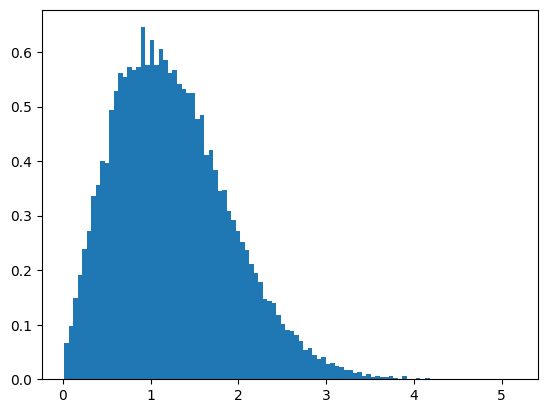

In [5]:
len(acceptance_ratio)/(len(chain) -1)  #### This chain is pretty in effiient.
plt.hist(chain[500:], bins =100, density = True);


## 3) Sketch QQ-plot of your a sample from the right Gamma distributions to see if your sample is reliable.
## See here for QQ plots: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot_2samples.html

In [7]:
from statsmodels.graphics.gofplots import qqplot_2samples
### Your code here
###
chain  = [1]
acc_rat = []
for i in tqdm(range(100000)):
    proposal_dist = stats.gamma(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.gamma(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acc_rat.append(1)
    else:
        chain.append(chain[-1])

100%|██████████| 100000/100000 [03:58<00:00, 419.56it/s]


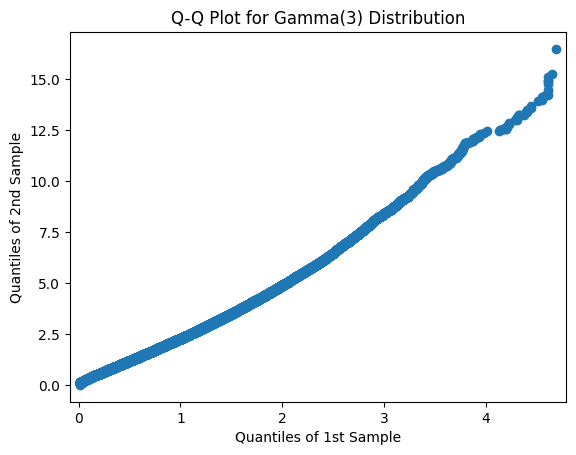

In [11]:
qqplot_2samples(np.array(chain), np.random.gamma(3,1, size=len(chain)))
plt.title('Q-Q Plot for Gamma(3) Distribution')
plt.show()

